# TTT4185 Machine learning for Speech technology

## Computer assigment 3b:  Regression analysis

Regression analysis is used to estimate/measure the relationship between an _independent_ variable, say $x$, and a _dependent_ variable, say $y$. One of the simplest regression problems is 
\begin{equation}
y = ax + b
\end{equation}
where $a$ and $b$ are constants. In practice our observations will be contaminated by noise, so we have
\begin{equation}
y = ax + b + n,
\end{equation}
where $n$ is noise, eg. measurement errors. This particular problem is called _linear regression_.

We will have a look at _non-linear regression_, using deep neural networks. Here we are looking at general regression problems in the form 
\begin{equation}
y = f(x) + n.
\end{equation}

We generate our data according to the function $f(x) = x^2 + \cos(20x) \text{ sign}(x)$, obtaining a set of observations $\{(x_i,y_i)\}$.

Then we assume we do not know the underlying function and we try to recover and approximation of $f$ only using the observations $\{(x_i,y_i)\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

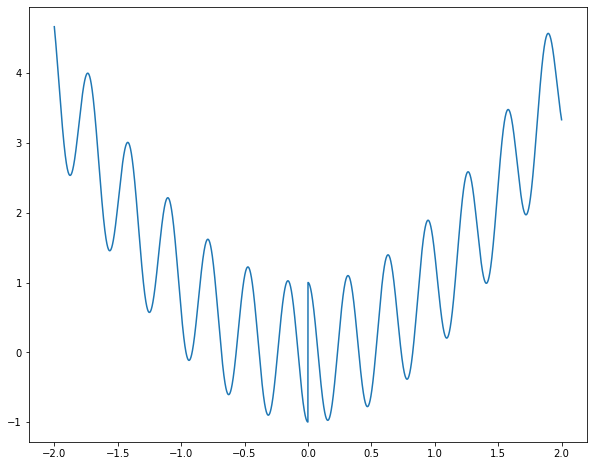

In [2]:
# Define function
def f(x):
    return x**2 + np.cos(20*x)*np.sign(x)

# Setup some simulation parameters
# Number of observations
N = 5000

# Plot a "clean" version of the relationship between x and y
plt.figure(figsize=(10, 8))
x = np.linspace(-2,2,N)
plt.plot(x,f(x))
plt.show()

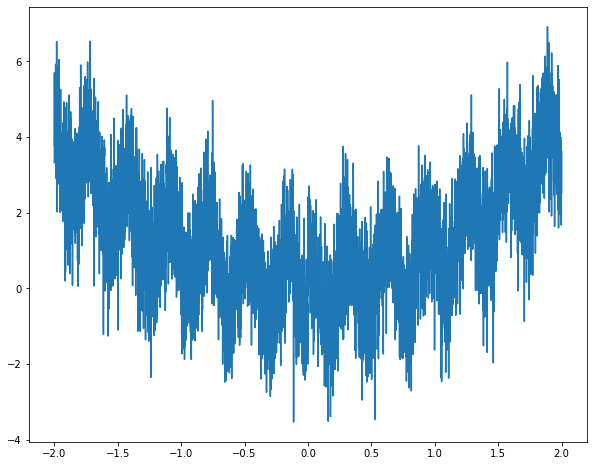

In [3]:
# Create a noise version of the observations
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(10, 8))
plt.plot(x,y)
plt.show()

One way to perform regression is to assume that the data is generated using a set of functions from a cerain family, for example polynomials of order $p$,
\begin{equation}
\hat f(x) = a_0 + a_1 x + a_2 x^2 \ldots a_p x^p.
\end{equation}
Then regression corresponds to fitting the parameters in the model. Let us see how this works out before using our neural networks.

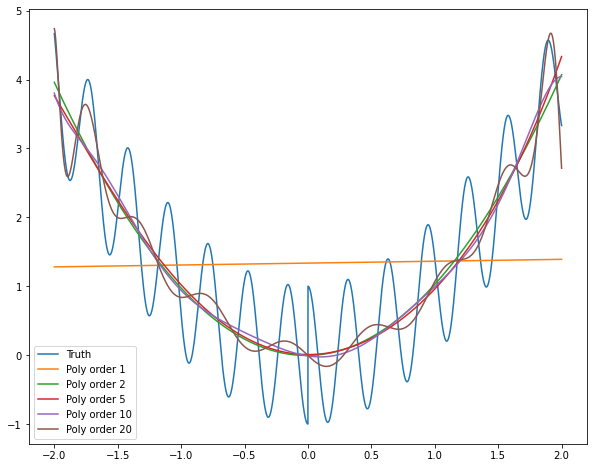

In [4]:
# Give a set of polynomial orders to try
P = [1, 2, 5, 10, 20]

# Define estimator function. Arguments are inout variable, observation and polynomial order
# Returns a set of polynomial coefficients
def reg_estimator(x,y,p):
    # Use simple ls approach
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

# Computes fx) = c_0 + c_1x + c_2 x^2 ... c_p x^p
def poly(x, C):
    # compute p(x) for coeffs in c
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

## Problem 1
Play with different $p$ to see how close you can get to the true function.

Note: Very high $p$ will give numerical problems.

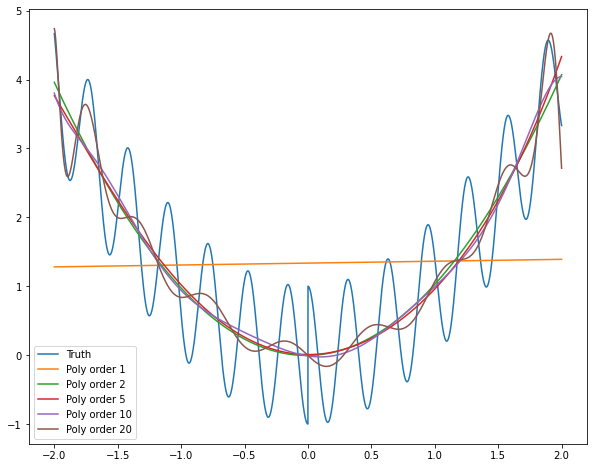

In [11]:
# Give a set of polynomial orders to try
P = [1, 2, 5, 10, 20]

# Define estimator function. Arguments are inout variable, observation and polynomial order
# Returns a set of polynomial coefficients
def reg_estimator(x,y,p):
    # Use simple ls approach
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

# Computes fx) = c_0 + c_1x + c_2 x^2 ... c_p x^p
def poly(x, C):
    # compute p(x) for coeffs in c
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

In what follows we will use a deep neural network to approximate $f$. We set this up below

In [12]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 512
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


We train the network by using $x$ as an input and the squared error between the network output $\hat y$ and the observed value $y$ as a loss
\begin{equation}
 L = \frac{1}{N} \sum_n (\hat y - y)^2
\end{equation}

We first try our network on clean data to check if it works.

In [13]:
# train the model
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Epoch 1/1000
40/40 [==============================] - 0s 1ms/step - loss: 1.9887 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.8735 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.0000e+00
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.0000e+00
Epoch 6/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.0000e+00
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.0000e+00
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.0000e+00
Epoch 9/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.0000e+00
Epoch 10/1000
40/40 [==============================] - 0s 2ms/st

40/40 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.0000e+00
Epoch 79/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.0000e+00
Epoch 80/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4877 - accuracy: 0.0000e+00
Epoch 81/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.0000e+00
Epoch 82/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.0000e+00
Epoch 83/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.0000e+00
Epoch 84/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.0000e+00
Epoch 85/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.0000e+00
Epoch 86/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.0000e+00
Epoch 87/1000
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.0000e+00
Epoch 156/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.0000e+00
Epoch 157/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.0000e+00
Epoch 158/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.0000e+00
Epoch 159/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.0000e+00
Epoch 160/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.0000e+00
Epoch 161/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.0000e+00
Epoch 162/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.0000e+00
Epoch 163/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.0000e+00
Epoch 164/1000
40/40 [==============================] - 0s 1m

40/40 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.0000e+00
Epoch 233/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.0000e+00
Epoch 234/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.0000e+00
Epoch 235/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.0000e+00
Epoch 236/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.0000e+00
Epoch 237/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.0000e+00
Epoch 238/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.0000e+00
Epoch 239/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.0000e+00
Epoch 240/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.0000e+00
Epoch 241/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 972us/step - loss: 0.4828 - accuracy: 0.0000e+00
Epoch 309/1000
40/40 [==============================] - 0s 997us/step - loss: 0.4807 - accuracy: 0.0000e+00
Epoch 310/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4829 - accuracy: 0.0000e+00
Epoch 311/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4846 - accuracy: 0.0000e+00
Epoch 312/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.0000e+00
Epoch 313/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.0000e+00
Epoch 314/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4829 - accuracy: 0.0000e+00
Epoch 315/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4813 - accuracy: 0.0000e+00
Epoch 316/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4814 - accuracy: 0.0000e+00
Epoch 317/1000
40/40 [=========================

40/40 [==============================] - 0s 947us/step - loss: 0.4807 - accuracy: 0.0000e+00
Epoch 385/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.0000e+00
Epoch 386/1000
40/40 [==============================] - 0s 997us/step - loss: 0.4825 - accuracy: 0.0000e+00
Epoch 387/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4799 - accuracy: 0.0000e+00
Epoch 388/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4809 - accuracy: 0.0000e+00
Epoch 389/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4814 - accuracy: 0.0000e+00
Epoch 390/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4820 - accuracy: 0.0000e+00
Epoch 391/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4797 - accuracy: 0.0000e+00
Epoch 392/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4811 - accuracy: 0.0000e+00
Epoch 393/1000
40/40 [=======================

40/40 [==============================] - 0s 972us/step - loss: 0.4835 - accuracy: 0.0000e+00
Epoch 460/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4772 - accuracy: 0.0000e+00
Epoch 461/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4806 - accuracy: 0.0000e+00
Epoch 462/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4810 - accuracy: 0.0000e+00
Epoch 463/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4793 - accuracy: 0.0000e+00
Epoch 464/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4824 - accuracy: 0.0000e+00
Epoch 465/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4804 - accuracy: 0.0000e+00
Epoch 466/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4812 - accuracy: 0.0000e+00
Epoch 467/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4794 - accuracy: 0.0000e+00
Epoch 468/1000
40/40 [=====================

40/40 [==============================] - 0s 972us/step - loss: 0.4758 - accuracy: 0.0000e+00
Epoch 536/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4764 - accuracy: 0.0000e+00
Epoch 537/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.0000e+00
Epoch 538/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4777 - accuracy: 0.0000e+00
Epoch 539/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4763 - accuracy: 0.0000e+00
Epoch 540/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4793 - accuracy: 0.0000e+00
Epoch 541/1000
40/40 [==============================] - 0s 997us/step - loss: 0.4785 - accuracy: 0.0000e+00
Epoch 542/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4763 - accuracy: 0.0000e+00
Epoch 543/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4765 - accuracy: 0.0000e+00
Epoch 544/1000
40/40 [=======================

40/40 [==============================] - 0s 781us/step - loss: 0.4758 - accuracy: 0.0000e+00
Epoch 612/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.0000e+00
Epoch 613/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.0000e+00
Epoch 614/1000
40/40 [==============================] - 0s 781us/step - loss: 0.4739 - accuracy: 0.0000e+00
Epoch 615/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.0000e+00
Epoch 616/1000
40/40 [==============================] - 0s 781us/step - loss: 0.4729 - accuracy: 0.0000e+00
Epoch 617/1000
40/40 [==============================] - 0s 997us/step - loss: 0.4748 - accuracy: 0.0000e+00
Epoch 618/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4724 - accuracy: 0.0000e+00
Epoch 619/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4723 - accuracy: 0.0000e+00
Epoch 620/1000
40/40 [===========================

40/40 [==============================] - 0s 972us/step - loss: 0.4718 - accuracy: 0.0000e+00
Epoch 687/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.0000e+00
Epoch 688/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4718 - accuracy: 0.0000e+00
Epoch 689/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4741 - accuracy: 0.0000e+00
Epoch 690/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4708 - accuracy: 0.0000e+00
Epoch 691/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4705 - accuracy: 0.0000e+00
Epoch 692/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4706 - accuracy: 0.0000e+00
Epoch 693/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4735 - accuracy: 0.0000e+00
Epoch 694/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4718 - accuracy: 0.0000e+00
Epoch 695/1000
40/40 [=======================

40/40 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.0000e+00
Epoch 763/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.0000e+00
Epoch 764/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.0000e+00
Epoch 765/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.0000e+00
Epoch 766/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.0000e+00
Epoch 767/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.0000e+00
Epoch 768/1000
40/40 [==============================] - 0s 997us/step - loss: 0.4679 - accuracy: 0.0000e+00
Epoch 769/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4687 - accuracy: 0.0000e+00
Epoch 770/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4719 - accuracy: 0.0000e+00
Epoch 771/1000
40/40 [==============================] -

40/40 [==============================] - 0s 947us/step - loss: 0.4667 - accuracy: 0.0000e+00
Epoch 838/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.0000e+00
Epoch 839/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.0000e+00
Epoch 840/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4681 - accuracy: 0.0000e+00
Epoch 841/1000
40/40 [==============================] - 0s 972us/step - loss: 0.4648 - accuracy: 0.0000e+00
Epoch 842/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4709 - accuracy: 0.0000e+00
Epoch 843/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4668 - accuracy: 0.0000e+00
Epoch 844/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4663 - accuracy: 0.0000e+00
Epoch 845/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4707 - accuracy: 0.0000e+00
Epoch 846/1000
40/40 [=========================

40/40 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.0000e+00
Epoch 914/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.0000e+00
Epoch 915/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.0000e+00
Epoch 916/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.0000e+00
Epoch 917/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.0000e+00
Epoch 918/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.0000e+00
Epoch 919/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.0000e+00
Epoch 920/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.0000e+00
Epoch 921/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.0000e+00
Epoch 922/1000
40/40 [==============================] - 0s 1m

40/40 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.0000e+00
Epoch 991/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.0000e+00
Epoch 992/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.0000e+00
Epoch 993/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.0000e+00
Epoch 994/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4587 - accuracy: 0.0000e+00
Epoch 995/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.0000e+00
Epoch 996/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.0000e+00
Epoch 997/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.0000e+00
Epoch 998/1000
40/40 [==============================] - 0s 947us/step - loss: 0.4608 - accuracy: 0.0000e+00
Epoch 999/1000
40/40 [==============================] - 0s 

Using the variable `history`, plot the evolution of the loss during training. 

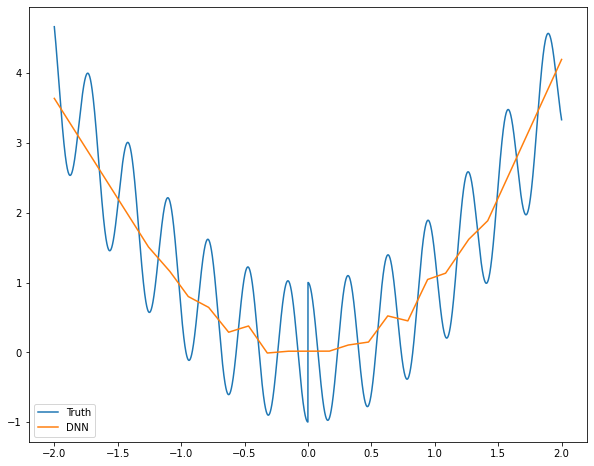

In [14]:
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 2
Try increasing the number of nodes in the network to see if the results can be improved.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1536)              3072      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1537      
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.4552 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.7106 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.0000e+00
Epoch 5/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.000

40/40 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.0000e+00
Epoch 74/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.0000e+00
Epoch 75/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.0000e+00
Epoch 76/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.0000e+00
Epoch 77/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.0000e+00
Epoch 78/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.0000e+00
Epoch 79/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.0000e+00
Epoch 80/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.0000e+00
Epoch 81/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.0000e+00
Epoch 82/1000
40/40 [==============================] - 0s 3ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.0000e+00
Epoch 151/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.0000e+00
Epoch 152/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.0000e+00
Epoch 153/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.0000e+00
Epoch 154/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.0000e+00
Epoch 155/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.0000e+00
Epoch 156/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.0000e+00
Epoch 157/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.0000e+00
Epoch 158/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.0000e+00
Epoch 159/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.0000e+00
Epoch 228/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.0000e+00
Epoch 229/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.0000e+00
Epoch 230/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.0000e+00
Epoch 231/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.0000e+00
Epoch 232/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.0000e+00
Epoch 233/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.0000e+00
Epoch 234/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.0000e+00
Epoch 235/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.0000e+00
Epoch 236/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4846 - accuracy: 0.0000e+00
Epoch 305/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.0000e+00
Epoch 306/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.0000e+00
Epoch 307/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.0000e+00
Epoch 308/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.0000e+00
Epoch 309/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.0000e+00
Epoch 310/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.0000e+00
Epoch 311/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.0000e+00
Epoch 312/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.0000e+00
Epoch 313/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.0000e+00
Epoch 382/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.0000e+00
Epoch 383/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.0000e+00
Epoch 384/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.0000e+00
Epoch 385/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 0.0000e+00
Epoch 386/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.0000e+00
Epoch 387/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.0000e+00
Epoch 388/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.0000e+00
Epoch 389/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.0000e+00
Epoch 390/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.0000e+00
Epoch 459/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.0000e+00
Epoch 460/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.0000e+00
Epoch 461/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.0000e+00
Epoch 462/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.0000e+00
Epoch 463/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.0000e+00
Epoch 464/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.0000e+00
Epoch 465/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.0000e+00
Epoch 466/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.0000e+00
Epoch 467/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.0000e+00
Epoch 536/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.0000e+00
Epoch 537/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.0000e+00
Epoch 538/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.0000e+00
Epoch 539/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.0000e+00
Epoch 540/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.0000e+00
Epoch 541/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.0000e+00
Epoch 542/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.0000e+00
Epoch 543/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4867 - accuracy: 0.0000e+00
Epoch 544/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.0000e+00
Epoch 613/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4782 - accuracy: 0.0000e+00
Epoch 614/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.0000e+00
Epoch 615/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.0000e+00
Epoch 616/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.0000e+00
Epoch 617/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.0000e+00
Epoch 618/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.0000e+00
Epoch 619/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.0000e+00
Epoch 620/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.0000e+00
Epoch 621/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.0000e+00
Epoch 690/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.0000e+00
Epoch 691/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.0000e+00
Epoch 692/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.0000e+00
Epoch 693/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.0000e+00
Epoch 694/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.0000e+00
Epoch 695/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.0000e+00
Epoch 696/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.0000e+00
Epoch 697/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.0000e+00
Epoch 698/1000
40/40 [==============================] - ETA: 

Epoch 766/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.0000e+00
Epoch 767/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.0000e+00
Epoch 768/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.0000e+00
Epoch 769/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.0000e+00
Epoch 770/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.0000e+00
Epoch 771/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.0000e+00
Epoch 772/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.0000e+00
Epoch 773/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.0000e+00
Epoch 774/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.0000e+00
Epoch 775/1000
40/40 [========================

40/40 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.0000e+00
Epoch 844/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.0000e+00
Epoch 845/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.0000e+00
Epoch 846/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.0000e+00
Epoch 847/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.0000e+00
Epoch 848/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.0000e+00
Epoch 849/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.0000e+00
Epoch 850/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.0000e+00
Epoch 851/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.0000e+00
Epoch 852/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.0000e+00
Epoch 920/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4663 - accuracy: 0.0000e+00
Epoch 921/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.0000e+00
Epoch 922/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.0000e+00
Epoch 923/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.0000e+00
Epoch 924/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.0000e+00
Epoch 925/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4661 - accuracy: 0.0000e+00
Epoch 926/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.0000e+00
Epoch 927/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.0000e+00
Epoch 928/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.0000e+00
Epoch 997/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.0000e+00
Epoch 998/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.0000e+00
Epoch 999/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.0000e+00
Epoch 1000/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.0000e+00


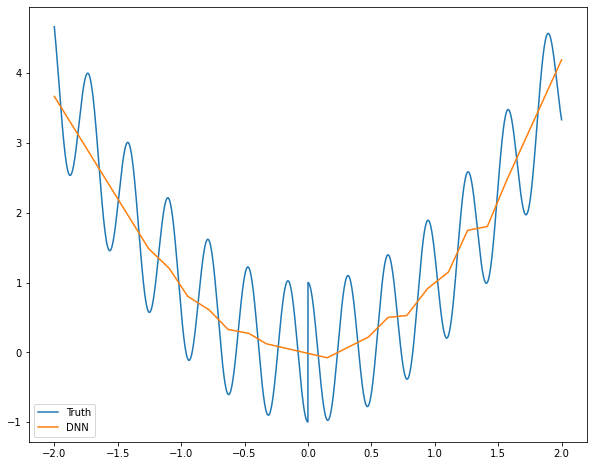

In [18]:
M = 512
N=3
model = keras.Sequential([
    keras.layers.Dense(M*N, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])
# train the model
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

Next we will use a deep network with more than one hidden layer.

In [19]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 2ms/step - loss: 3.1876 - accuracy: 0.0000e+00
Epoch 2/1000
40/40

40/40 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.0000e+00
Epoch 70/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.0000e+00
Epoch 71/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.0000e+00
Epoch 72/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.0000e+00
Epoch 73/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.0000e+00
Epoch 74/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.0000e+00
Epoch 75/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.0000e+00
Epoch 76/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.0000e+00: 0s - loss: 0.3825 - accuracy: 0.0000e+
Epoch 77/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.0000e+00
Epoch 78/1000
40/40 [========

40/40 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.0000e+00
Epoch 146/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.0000e+00
Epoch 147/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.0000e+00
Epoch 148/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.0000e+00
Epoch 149/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.0000e+00
Epoch 150/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.0000e+00
Epoch 151/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.0000e+00
Epoch 152/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.3500 - accuracy: 0.0000e+00
Epoch 153/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.0000e+00
Epoch 154/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.0000e+00
Epoch 222/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.0000e+00
Epoch 223/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.0000e+00
Epoch 224/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.0000e+00
Epoch 225/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.0000e+00
Epoch 226/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.0000e+00
Epoch 227/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.0000e+00
Epoch 228/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.0000e+00
Epoch 229/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.0000e+00
Epoch 230/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.0000e+00
Epoch 298/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.0000e+00
Epoch 299/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.0000e+00
Epoch 300/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 0.0000e+00
Epoch 301/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.0000e+00
Epoch 302/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.0000e+00
Epoch 303/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.0000e+00
Epoch 304/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.0000e+00
Epoch 305/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.0000e+00
Epoch 306/1000
40/40 [==============================] - 0s 2m

Epoch 374/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.0000e+00
Epoch 375/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2436 - accuracy: 0.0000e+00
Epoch 376/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.0000e+00
Epoch 377/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.0000e+00
Epoch 378/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.0000e+00
Epoch 379/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.0000e+00
Epoch 380/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.0000e+00
Epoch 381/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.0000e+00
Epoch 382/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.0000e+00
Epoch 383/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.0000e+00
Epoch 451/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.0000e+00
Epoch 452/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.0000e+00
Epoch 453/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.0000e+00
Epoch 454/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.0000e+00
Epoch 455/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2441 - accuracy: 0.0000e+00
Epoch 456/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.0000e+00
Epoch 457/1000
40/40 [==============================] - 0s 3ms/step - loss: 0.2453 - accuracy: 0.0000e+00
Epoch 458/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.0000e+00
Epoch 459/1000
40/40 [==============================] - 0s 2m

Epoch 527/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.0000e+00
Epoch 528/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.0000e+00
Epoch 529/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.0000e+00
Epoch 530/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.0000e+00
Epoch 531/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.0000e+00
Epoch 532/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.0000e+00
Epoch 533/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.0000e+00
Epoch 534/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.0000e+00
Epoch 535/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.0000e+00
Epoch 536/1000
40/40 [========================

Epoch 603/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.0000e+00
Epoch 604/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.0000e+00
Epoch 605/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.0000e+00
Epoch 606/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.0000e+00
Epoch 607/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.0000e+00
Epoch 608/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.0000e+00
Epoch 609/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.0000e+00
Epoch 610/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.0000e+00
Epoch 611/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.0000e+00
Epoch 612/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.0000e+00
Epoch 680/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2149 - accuracy: 0.0000e+00
Epoch 681/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.0000e+00
Epoch 682/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.0000e+00
Epoch 683/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2113 - accuracy: 0.0000e+00
Epoch 684/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.0000e+00
Epoch 685/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.0000e+00
Epoch 686/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.0000e+00
Epoch 687/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.0000e+00
Epoch 688/1000
40/40 [==============================] - 0s 2m

Epoch 756/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.0000e+00
Epoch 757/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2049 - accuracy: 0.0000e+00
Epoch 758/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.0000e+00
Epoch 759/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.0000e+00
Epoch 760/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.0000e+00
Epoch 761/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.0000e+00
Epoch 762/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.0000e+00
Epoch 763/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.0000e+00
Epoch 764/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.0000e+00
Epoch 765/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.0000e+00
Epoch 834/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.0000e+00
Epoch 835/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.0000e+00
Epoch 836/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1997 - accuracy: 0.0000e+00
Epoch 837/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.0000e+00
Epoch 838/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.0000e+00
Epoch 839/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.0000e+00
Epoch 840/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.0000e+00
Epoch 841/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1952 - accuracy: 0.0000e+00
Epoch 842/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.0000e+00
Epoch 911/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.0000e+00
Epoch 912/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.0000e+00
Epoch 913/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.0000e+00
Epoch 914/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.0000e+00
Epoch 915/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.0000e+00
Epoch 916/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.0000e+00
Epoch 917/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.0000e+00
Epoch 918/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.0000e+00
Epoch 919/1000
40/40 [==============================] - 0s 2m

Epoch 987/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1705 - accuracy: 0.0000e+00
Epoch 988/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.0000e+00
Epoch 989/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.0000e+00
Epoch 990/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.0000e+00
Epoch 991/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1719 - accuracy: 0.0000e+00
Epoch 992/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.0000e+00
Epoch 993/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.0000e+00
Epoch 994/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.0000e+00
Epoch 995/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.0000e+00
Epoch 996/1000
40/40 [========================

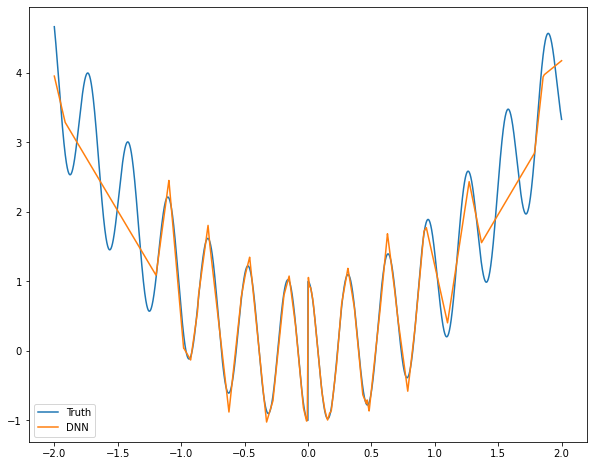

In [20]:
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 3
Try increasing the number of hidden nodes per layer until performance is satisfactory. Can the same effect be achieved by just adding more layers?

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 48)                96        
_________________________________________________________________
dense_16 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_17 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_18 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 49        
Total params: 7,201
Trainable params: 7,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.4684 - accuracy: 0.0000e+00
Epoch 2/1000
4

40/40 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.0000e+00
Epoch 70/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.0000e+00
Epoch 71/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.0000e+00
Epoch 72/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.0000e+00
Epoch 73/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.0000e+00
Epoch 74/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.0000e+00
Epoch 75/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.0000e+00
Epoch 76/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.0000e+00
Epoch 77/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.0000e+00
Epoch 78/1000
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.0000e+00
Epoch 147/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.0000e+00
Epoch 148/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.0000e+00
Epoch 149/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.0000e+00
Epoch 150/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.0000e+00
Epoch 151/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.0000e+00
Epoch 152/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.0000e+00
Epoch 153/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 0.0000e+00
Epoch 154/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.0000e+00
Epoch 155/1000
40/40 [==============================] - 0s 2m

Epoch 223/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 224/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.0000e+00
Epoch 225/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.0000e+00
Epoch 226/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.0000e+00
Epoch 227/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.0000e+00
Epoch 228/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.0000e+00
Epoch 229/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.0000e+00
Epoch 230/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.0000e+00
Epoch 231/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 232/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 300/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 301/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 302/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 303/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 304/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 305/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.0000e+00
Epoch 306/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 307/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.0000e+00
Epoch 308/1000
40/40 [==============================] - 0s 2m

Epoch 376/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 377/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 378/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 379/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 380/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 381/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 382/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 383/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 384/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 385/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 454/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 455/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 456/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 457/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 458/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 459/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 460/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 461/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 462/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 530/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.0000e+00
Epoch 531/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.0000e+00
Epoch 532/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 0.0000e+00
Epoch 533/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 534/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 535/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 536/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 537/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 538/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.0000e+00
Epoch 607/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 608/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 609/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 610/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 611/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 612/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 613/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 614/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 615/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 684/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 685/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 686/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 687/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 688/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 689/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 690/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 691/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 692/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 760/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 761/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 762/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 763/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 764/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 765/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 766/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 767/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 768/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 837/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 838/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 839/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 840/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 841/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 842/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 843/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 844/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 845/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 914/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 915/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 916/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 917/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 918/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 919/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 920/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 921/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 922/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 990/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 991/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 992/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 993/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 994/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 995/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 996/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 997/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 998/1000
40/40 [==============================] - 0s 2m

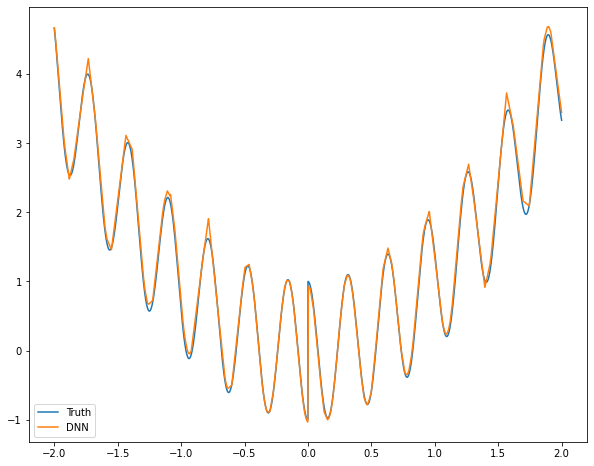

In [21]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16
N=3
model = keras.Sequential([
    keras.layers.Dense(M*N, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M*N, activation=tf.nn.relu),
    keras.layers.Dense(M*N, activation=tf.nn.relu),
    keras.layers.Dense(M*N, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)


z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 4
Using the best setup from the previous problem, train a model using the noisy data.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 48)                96        
_________________________________________________________________
dense_21 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_22 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_23 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 49        
Total params: 7,201
Trainable params: 7,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 2ms/step - loss: 3.0454 - accuracy: 0.0000e+00
Epoch 2/1000
4

40/40 [==============================] - 0s 2ms/step - loss: 1.3989 - accuracy: 0.0000e+00
Epoch 70/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.4025 - accuracy: 0.0000e+00
Epoch 71/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3853 - accuracy: 0.0000e+00
Epoch 72/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3861 - accuracy: 0.0000e+00
Epoch 73/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3899 - accuracy: 0.0000e+00
Epoch 74/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3878 - accuracy: 0.0000e+00
Epoch 75/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3936 - accuracy: 0.0000e+00
Epoch 76/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3863 - accuracy: 0.0000e+00
Epoch 77/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3905 - accuracy: 0.0000e+00
Epoch 78/1000
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 2ms/step - loss: 1.3719 - accuracy: 0.0000e+00
Epoch 147/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3638 - accuracy: 0.0000e+00
Epoch 148/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3671 - accuracy: 0.0000e+00
Epoch 149/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3615 - accuracy: 0.0000e+00
Epoch 150/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3729 - accuracy: 0.0000e+00
Epoch 151/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3742 - accuracy: 0.0000e+00
Epoch 152/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3798 - accuracy: 0.0000e+00
Epoch 153/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3744 - accuracy: 0.0000e+00
Epoch 154/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3885 - accuracy: 0.0000e+00
Epoch 155/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 1.3160 - accuracy: 0.0000e+00
Epoch 224/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3124 - accuracy: 0.0000e+00
Epoch 225/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3204 - accuracy: 0.0000e+00
Epoch 226/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3201 - accuracy: 0.0000e+00
Epoch 227/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3335 - accuracy: 0.0000e+00
Epoch 228/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3182 - accuracy: 0.0000e+00
Epoch 229/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3200 - accuracy: 0.0000e+00
Epoch 230/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3045 - accuracy: 0.0000e+00
Epoch 231/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.3046 - accuracy: 0.0000e+00
Epoch 232/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 1.2439 - accuracy: 0.0000e+00
Epoch 301/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2464 - accuracy: 0.0000e+00
Epoch 302/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2345 - accuracy: 0.0000e+00
Epoch 303/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2520 - accuracy: 0.0000e+00
Epoch 304/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2470 - accuracy: 0.0000e+00
Epoch 305/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2588 - accuracy: 0.0000e+00
Epoch 306/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2651 - accuracy: 0.0000e+00
Epoch 307/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2463 - accuracy: 0.0000e+00
Epoch 308/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.2487 - accuracy: 0.0000e+00
Epoch 309/1000
40/40 [==============================] - 0s 2m

Epoch 377/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1600 - accuracy: 0.0000e+00
Epoch 378/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1521 - accuracy: 0.0000e+00
Epoch 379/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1517 - accuracy: 0.0000e+00
Epoch 380/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1497 - accuracy: 0.0000e+00
Epoch 381/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1834 - accuracy: 0.0000e+00
Epoch 382/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1474 - accuracy: 0.0000e+00
Epoch 383/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1475 - accuracy: 0.0000e+00
Epoch 384/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1513 - accuracy: 0.0000e+00
Epoch 385/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1607 - accuracy: 0.0000e+00
Epoch 386/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 1.0881 - accuracy: 0.0000e+00
Epoch 454/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0784 - accuracy: 0.0000e+00
Epoch 455/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0975 - accuracy: 0.0000e+00
Epoch 456/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1086 - accuracy: 0.0000e+00
Epoch 457/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0898 - accuracy: 0.0000e+00
Epoch 458/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0765 - accuracy: 0.0000e+00
Epoch 459/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0979 - accuracy: 0.0000e+00
Epoch 460/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1120 - accuracy: 0.0000e+00
Epoch 461/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0814 - accuracy: 0.0000e+00
Epoch 462/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.0000e+00
Epoch 530/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.1206 - accuracy: 0.0000e+00
Epoch 531/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.0000e+00
Epoch 532/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0641 - accuracy: 0.0000e+00
Epoch 533/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0663 - accuracy: 0.0000e+00
Epoch 534/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0524 - accuracy: 0.0000e+00
Epoch 535/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0812 - accuracy: 0.0000e+00
Epoch 536/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0782 - accuracy: 0.0000e+00
Epoch 537/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0463 - accuracy: 0.0000e+00
Epoch 538/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 1.0563 - accuracy: 0.0000e+00
Epoch 607/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.0000e+00
Epoch 608/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0434 - accuracy: 0.0000e+00
Epoch 609/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0502 - accuracy: 0.0000e+00
Epoch 610/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0545 - accuracy: 0.0000e+00
Epoch 611/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0587 - accuracy: 0.0000e+00
Epoch 612/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0653 - accuracy: 0.0000e+00
Epoch 613/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0788 - accuracy: 0.0000e+00
Epoch 614/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0587 - accuracy: 0.0000e+00
Epoch 615/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 1.0297 - accuracy: 0.0000e+00
Epoch 684/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0333 - accuracy: 0.0000e+00
Epoch 685/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.0000e+00
Epoch 686/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.0000e+00
Epoch 687/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0549 - accuracy: 0.0000e+00
Epoch 688/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0317 - accuracy: 0.0000e+00
Epoch 689/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0467 - accuracy: 0.0000e+00
Epoch 690/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0332 - accuracy: 0.0000e+00
Epoch 691/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0506 - accuracy: 0.0000e+00
Epoch 692/1000
40/40 [==============================] - 0s 2m

40/40 [==============================] - 0s 2ms/step - loss: 1.0310 - accuracy: 0.0000e+00
Epoch 761/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0448 - accuracy: 0.0000e+00
Epoch 762/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.0000e+00
Epoch 763/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0516 - accuracy: 0.0000e+00
Epoch 764/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0351 - accuracy: 0.0000e+00
Epoch 765/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0451 - accuracy: 0.0000e+00
Epoch 766/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.0000e+00
Epoch 767/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0446 - accuracy: 0.0000e+00
Epoch 768/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.0000e+00
Epoch 769/1000
40/40 [==============================] - 0s 2m

Epoch 837/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0489 - accuracy: 0.0000e+00
Epoch 838/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0276 - accuracy: 0.0000e+00
Epoch 839/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0278 - accuracy: 0.0000e+00
Epoch 840/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0292 - accuracy: 0.0000e+00
Epoch 841/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0309 - accuracy: 0.0000e+00
Epoch 842/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0437 - accuracy: 0.0000e+00
Epoch 843/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0427 - accuracy: 0.0000e+00
Epoch 844/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0419 - accuracy: 0.0000e+00
Epoch 845/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0435 - accuracy: 0.0000e+00
Epoch 846/1000
40/40 [========================

40/40 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.0000e+00
Epoch 915/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0615 - accuracy: 0.0000e+00
Epoch 916/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0296 - accuracy: 0.0000e+00
Epoch 917/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0260 - accuracy: 0.0000e+00
Epoch 918/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.0000e+00
Epoch 919/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0320 - accuracy: 0.0000e+00
Epoch 920/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0504 - accuracy: 0.0000e+00
Epoch 921/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0220 - accuracy: 0.0000e+00
Epoch 922/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0414 - accuracy: 0.0000e+00
Epoch 923/1000
40/40 [==============================] - 0s 2m

Epoch 991/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0177 - accuracy: 0.0000e+00
Epoch 992/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0252 - accuracy: 0.0000e+00
Epoch 993/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0268 - accuracy: 0.0000e+00
Epoch 994/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0262 - accuracy: 0.0000e+00
Epoch 995/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0408 - accuracy: 0.0000e+00
Epoch 996/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0339 - accuracy: 0.0000e+00
Epoch 997/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0312 - accuracy: 0.0000e+00
Epoch 998/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0247 - accuracy: 0.0000e+00
Epoch 999/1000
40/40 [==============================] - 0s 2ms/step - loss: 1.0352 - accuracy: 0.0000e+00
Epoch 1000/1000
40/40 [=======================

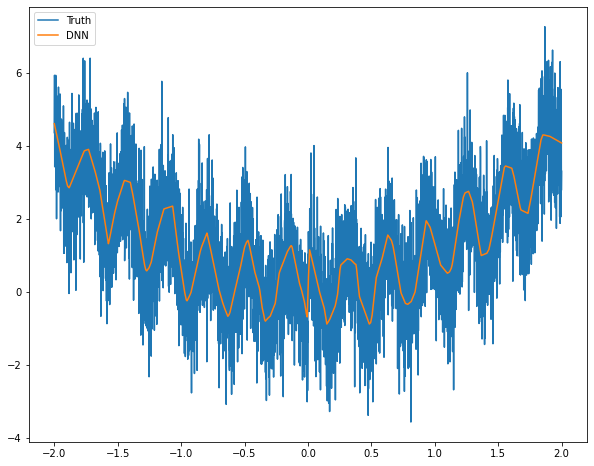

In [22]:
y = f(x) + np.random.randn(len(x))
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16
N=3
model = keras.Sequential([
    keras.layers.Dense(M*N, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M*N, activation=tf.nn.relu),
    keras.layers.Dense(M*N, activation=tf.nn.relu),
    keras.layers.Dense(M*N, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, y, epochs=1000, batch_size=128, verbose=True)


z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,y,label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()
